# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
count = len(cities)
count

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create empty list to hold all of the weather data
weather_data = []

# Format API request
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Print header for API processing log
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Conduct a series of successive API calls to gather weather data for 500+ cities
n = 1
for city_name in cities: #city_names:
    print(f'Processing Record {n} of {count} | {city_name}')
    n = n+1

# Check to make sure the city has weather data, if not skip that city and continue     
    try:
        
# Get the response from the API request and capture the required weather data values from the request        
        response = requests.get(query_url + city_name).json()
        lattitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        temperature = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]

# Create a list to store all of the weather data for the city        
        weather_results = []
        items = [city_name, lattitude, longitude, temperature, humidity, cloudiness, wind_speed, country, date]
        for item in items:
            weather_results.append(item)
            
# Append the city weather data to the complete weather data list            
        weather_data.append(weather_results)

# Generate an exception message if the city weather data not found    
    except Exception:
        print(f'{city_name} not found. Skipping...')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of 631 | samusu
samusu not found. Skipping...
Processing Record 2 of 631 | kapaa
Processing Record 3 of 631 | butaritari
Processing Record 4 of 631 | charters towers
Processing Record 5 of 631 | chupa
Processing Record 6 of 631 | palabuhanratu
palabuhanratu not found. Skipping...
Processing Record 7 of 631 | san patricio
Processing Record 8 of 631 | bukachacha
Processing Record 9 of 631 | lunca
Processing Record 10 of 631 | gapan
Processing Record 11 of 631 | carsamba
Processing Record 12 of 631 | chardara
Processing Record 13 of 631 | juneau
Processing Record 14 of 631 | vaini
Processing Record 15 of 631 | tuatapere
Processing Record 16 of 631 | puerto leguizamo
Processing Record 17 of 631 | lebu
Processing Record 18 of 631 | dikson
Processing Record 19 of 631 | faanui
Processing Record 20 of 631 | sergeyevka
Processing Record 21 of 631 | baykit
Processing Record 22 of 631 | arraial do cabo
Processing Reco

Processing Record 186 of 631 | lompoc
Processing Record 187 of 631 | bairiki
Processing Record 188 of 631 | izhmorskiy
Processing Record 189 of 631 | kangaatsiaq
Processing Record 190 of 631 | raahe
Processing Record 191 of 631 | hamilton
Processing Record 192 of 631 | alice springs
Processing Record 193 of 631 | nizhneyansk
nizhneyansk not found. Skipping...
Processing Record 194 of 631 | pangnirtung
Processing Record 195 of 631 | helena
Processing Record 196 of 631 | iralaya
Processing Record 197 of 631 | kiunga
Processing Record 198 of 631 | tarudant
tarudant not found. Skipping...
Processing Record 199 of 631 | ancud
Processing Record 200 of 631 | norman wells
Processing Record 201 of 631 | viligili
viligili not found. Skipping...
Processing Record 202 of 631 | kedrovyy
Processing Record 203 of 631 | moerdijk
Processing Record 204 of 631 | salihorsk
Processing Record 205 of 631 | achikulak
Processing Record 206 of 631 | hofn
Processing Record 207 of 631 | sambava
Processing Record 

Processing Record 375 of 631 | ribas do rio pardo
Processing Record 376 of 631 | katsuura
Processing Record 377 of 631 | areosa
Processing Record 378 of 631 | imbituba
Processing Record 379 of 631 | manuk mangkaw
Processing Record 380 of 631 | yacuiba
Processing Record 381 of 631 | mutsamudu
mutsamudu not found. Skipping...
Processing Record 382 of 631 | seymchan
Processing Record 383 of 631 | utiroa
utiroa not found. Skipping...
Processing Record 384 of 631 | chagda
chagda not found. Skipping...
Processing Record 385 of 631 | zyryanovsk
Processing Record 386 of 631 | port hedland
Processing Record 387 of 631 | shimanovsk
Processing Record 388 of 631 | nea peramos
Processing Record 389 of 631 | mrirt
mrirt not found. Skipping...
Processing Record 390 of 631 | jahrom
jahrom not found. Skipping...
Processing Record 391 of 631 | cockburn harbour
cockburn harbour not found. Skipping...
Processing Record 392 of 631 | trinidad
Processing Record 393 of 631 | kushiro
Processing Record 394 of 6

Processing Record 562 of 631 | do gonbadan
Processing Record 563 of 631 | tsiroanomandidy
Processing Record 564 of 631 | xiaoyi
Processing Record 565 of 631 | novocheremshansk
Processing Record 566 of 631 | suicheng
Processing Record 567 of 631 | songling
Processing Record 568 of 631 | el campo
Processing Record 569 of 631 | tsihombe
tsihombe not found. Skipping...
Processing Record 570 of 631 | kurchum
Processing Record 571 of 631 | mayenne
Processing Record 572 of 631 | bonavista
Processing Record 573 of 631 | naousa
Processing Record 574 of 631 | porangatu
Processing Record 575 of 631 | ornskoldsvik
Processing Record 576 of 631 | montepuez
Processing Record 577 of 631 | ingham
Processing Record 578 of 631 | derzhavinsk
Processing Record 579 of 631 | nador
Processing Record 580 of 631 | mareeba
Processing Record 581 of 631 | namatanai
Processing Record 582 of 631 | rio grande
Processing Record 583 of 631 | borovoy
Processing Record 584 of 631 | suntar
Processing Record 585 of 631 | h

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a DataFrame to hold the weather data and export to a .csv file
city_data = pd.DataFrame(weather_data,columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
city_data.to_csv(output_data_file)
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.08,-159.32,81.00,88,75,5.82,US,1602979591
1,butaritari,3.07,172.79,82.54,78,29,20.00,KI,1602979686
2,charters towers,-20.10,146.27,78.40,45,0,7.18,AU,1602980153
3,chupa,66.27,33.05,34.92,95,100,15.32,RU,1602980153
4,san patricio,28.02,-97.52,82.40,61,20,16.11,US,1602979659
...,...,...,...,...,...,...,...,...,...
565,bandarbeyla,9.49,50.81,78.67,80,0,8.77,SO,1602980240
566,mercedes,-34.65,-59.43,72.00,86,2,8.25,AR,1602980240
567,lukulu,-14.37,23.24,70.25,30,0,7.54,ZM,1602980240
568,helong,42.54,129.00,49.14,52,4,6.53,CN,1602979710


In [5]:
# Generate Summary Statistics 
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.383175,21.398877,60.163807,72.678947,53.898246,7.651281,1.602980e+09
std,33.623320,91.158669,19.488459,19.965271,37.850137,5.363246,2.566977e+02
min,-54.800000,-179.170000,4.030000,7.000000,0.000000,0.360000,1.602979e+09
25%,-8.737500,-61.430000,46.400000,62.000000,14.000000,3.490000,1.602980e+09
50%,22.185000,23.730000,62.600000,78.000000,67.500000,6.520000,1.602980e+09
75%,48.630000,105.990000,77.252500,87.000000,90.000000,10.660000,1.602980e+09
max,78.220000,179.320000,93.990000,100.000000,100.000000,34.070000,1.602980e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Remove any cities with Humidity above 100%
c_d = city_data[city_data['Humidity'] > 100]
print(f'There are {len(c_d)} cities that have humidity over 100%')
city_data = city_data[city_data['Humidity'] <= 100]
city_data.describe()

There are 0 cities that have humidity over 100%


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.383175,21.398877,60.163807,72.678947,53.898246,7.651281,1.602980e+09
std,33.623320,91.158669,19.488459,19.965271,37.850137,5.363246,2.566977e+02
min,-54.800000,-179.170000,4.030000,7.000000,0.000000,0.360000,1.602979e+09
25%,-8.737500,-61.430000,46.400000,62.000000,14.000000,3.490000,1.602980e+09
50%,22.185000,23.730000,62.600000,78.000000,67.500000,6.520000,1.602980e+09
75%,48.630000,105.990000,77.252500,87.000000,90.000000,10.660000,1.602980e+09
max,78.220000,179.320000,93.990000,100.000000,100.000000,34.070000,1.602980e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
indices = list(c_d.index.values)
print(indices)
print(f'There are {len(indices)} cities that have humidity over 100%')

[]
There are 0 cities that have humidity over 100%


In [8]:
# Make a new DataFrame called "clean_city_data" equal to the city data to drop all humidity outliers by index.
clean_city_data = city_data[city_data['Humidity'] <= 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.08,-159.32,81.00,88,75,5.82,US,1602979591
1,butaritari,3.07,172.79,82.54,78,29,20.00,KI,1602979686
2,charters towers,-20.10,146.27,78.40,45,0,7.18,AU,1602980153
3,chupa,66.27,33.05,34.92,95,100,15.32,RU,1602980153
4,san patricio,28.02,-97.52,82.40,61,20,16.11,US,1602979659
...,...,...,...,...,...,...,...,...,...
565,bandarbeyla,9.49,50.81,78.67,80,0,8.77,SO,1602980240
566,mercedes,-34.65,-59.43,72.00,86,2,8.25,AR,1602980240
567,lukulu,-14.37,23.24,70.25,30,0,7.54,ZM,1602980240
568,helong,42.54,129.00,49.14,52,4,6.53,CN,1602979710


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

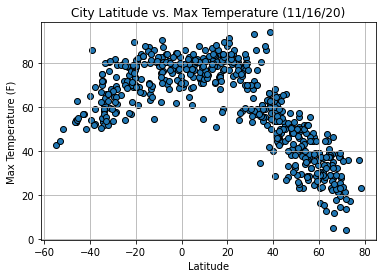

In [9]:
# Generate Scatter Plots
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'], marker='o', edgecolors = 'black')
plt.title('City Latitude vs. Max Temperature (11/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

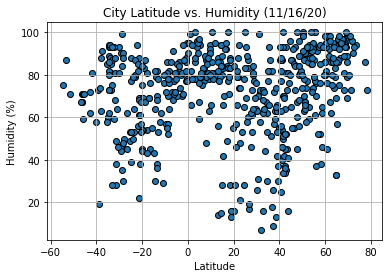

In [10]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'], marker='o', edgecolors = 'black')
plt.title('City Latitude vs. Humidity (11/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

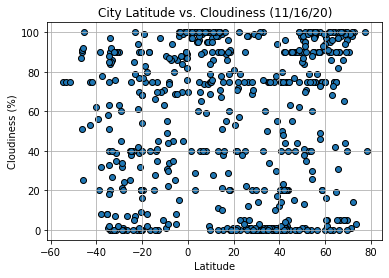

In [11]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'], marker='o', edgecolors = 'black')
plt.title('City Latitude vs. Cloudiness (11/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

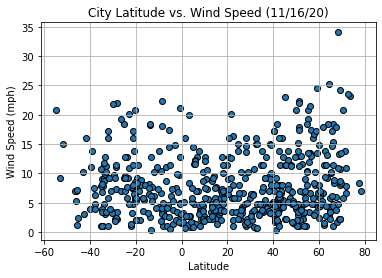

In [12]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'], marker='o', edgecolors = 'black')
plt.title('City Latitude vs. Wind Speed (11/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [13]:
# Split the DataFrame into Northern and Southern Hemisphere sets
north_hem = clean_city_data[clean_city_data['Lat'] >= 0]
south_hem = clean_city_data[clean_city_data['Lat'] < 0]

# Create lists of Latitudes
n_city_lat = north_hem['Lat']
s_city_lat = south_hem['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8760676411761039


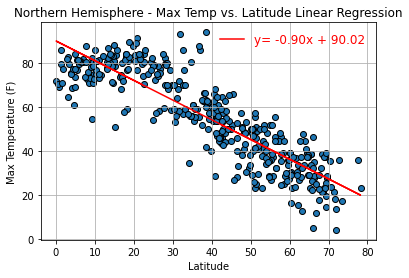

In [14]:
# Calculate Linear Regression models by hemishere and plot with scatter plots
n_temp = north_hem['Max Temp']
nt_slope, nt_int, nt_r, nt_p, nt_std_err = linregress(n_city_lat,n_temp)
nt_fit = nt_slope * n_city_lat + nt_int
form = 'y= {:.2f}x + {:.2f}'.format(nt_slope,nt_int)
print(f'The r-value is: {nt_r}')
plt.scatter(n_city_lat,n_temp, marker='o', edgecolors = 'black')
plt.plot(n_city_lat,nt_fit,c='r',label= form)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.legend(labelcolor='r',loc='best', fontsize=12, frameon=False)
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6483210981349066


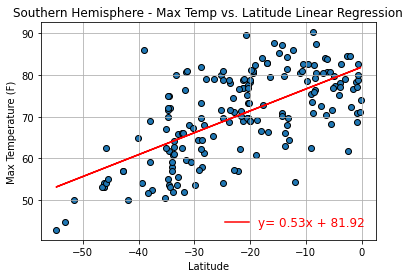

In [15]:
s_temp = south_hem['Max Temp']
st_slope, st_int, st_r, st_p, st_std_err = linregress(s_city_lat,s_temp)
st_fit = st_slope * s_city_lat + st_int
form = 'y= {:.2f}x + {:.2f}'.format(st_slope,st_int)
print(f'The r-value is: {st_r}')
plt.scatter(s_city_lat,s_temp, marker='o', edgecolors = 'black')
plt.plot(s_city_lat,st_fit,c='r',label= form)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.legend(labelcolor='r',loc='best', fontsize=12, frameon=False)
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12940765326963916


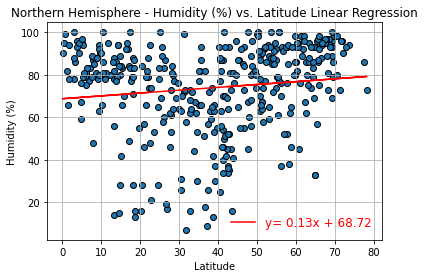

In [16]:
n_hum = north_hem['Humidity']
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(n_city_lat,n_hum)
nh_fit = nh_slope * n_city_lat + nh_int
form = 'y= {:.2f}x + {:.2f}'.format(nh_slope,nh_int)
print(f'The r-value is: {nh_r}')
plt.scatter(n_city_lat,n_hum, marker='o', edgecolors = 'black')
plt.plot(n_city_lat,nh_fit,c='r',label= form)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(labelcolor='r',loc='best', fontsize=12, frameon=False)
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07405537635131959


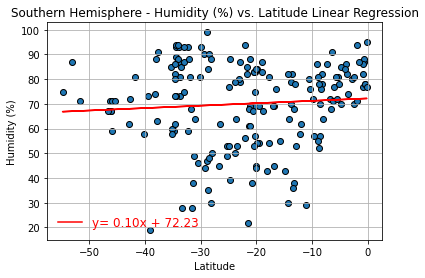

In [17]:
s_hum = south_hem['Humidity']
sh_slope, sh_int, sh_r, sh_p, sh_std_err = linregress(s_city_lat,s_hum)
sh_fit = sh_slope * s_city_lat + sh_int
form = 'y= {:.2f}x + {:.2f}'.format(sh_slope,sh_int)
print(f'The r-value is: {sh_r}')
plt.scatter(s_city_lat,s_hum, marker='o', edgecolors = 'black')
plt.plot(s_city_lat,sh_fit,c='r',label= form)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(labelcolor='r',loc='best', fontsize=12, frameon=False)
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03133624952412427


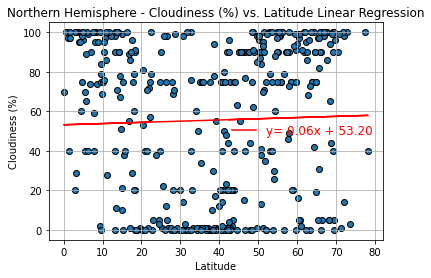

In [18]:
n_cloud = north_hem['Cloudiness']
nc_slope, nc_int, nc_r, nc_p, nc_std_err = linregress(n_city_lat,n_cloud)
nc_fit = nc_slope * n_city_lat + nc_int
form = 'y= {:.2f}x + {:.2f}'.format(nc_slope,nc_int)
print(f'The r-value is: {nc_r}')
plt.scatter(n_city_lat,n_cloud, marker='o', edgecolors = 'black')
plt.plot(n_city_lat,nc_fit,c='r',label= form)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend(labelcolor='r',loc='best', fontsize=12, frameon=False)
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1148928616329933


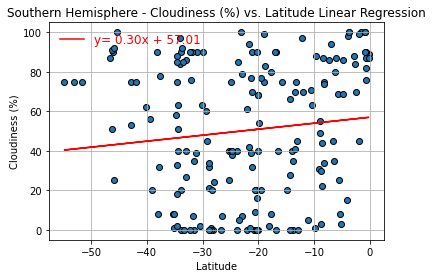

In [19]:
s_cloud = south_hem['Cloudiness']
sc_slope, sc_int, sc_r, sc_p, sc_std_err = linregress(s_city_lat,s_cloud)
sc_fit = sc_slope * s_city_lat + sc_int
form = 'y= {:.2f}x + {:.2f}'.format(sc_slope,sc_int)
print(f'The r-value is: {sc_r}')
plt.scatter(s_city_lat,s_cloud, marker='o', edgecolors = 'black')
plt.plot(s_city_lat,sc_fit,c='r',label= form)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend(labelcolor='r',loc='best', fontsize=12, frameon=False)
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.24011615937956035


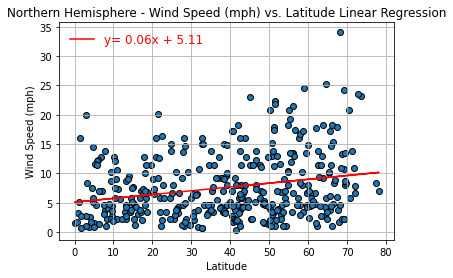

In [20]:
n_wind = north_hem['Wind Speed']
nw_slope, nw_int, nw_r, nw_p, nw_std_err = linregress(n_city_lat,n_wind)
nw_fit = nw_slope * n_city_lat + nw_int
form = 'y= {:.2f}x + {:.2f}'.format(nw_slope,nw_int)
print(f'The r-value is: {nw_r}')
plt.scatter(n_city_lat,n_wind, marker='o', edgecolors = 'black')
plt.plot(n_city_lat,nw_fit,c='r',label= form)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.legend(labelcolor='r',loc='best', fontsize=12, frameon=False)
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.07850083778225941


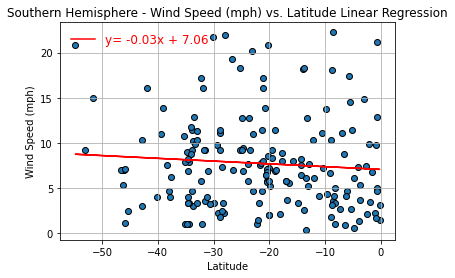

In [21]:
s_wind = south_hem['Wind Speed']
sw_slope, sw_int, sw_r, sw_p, sw_std_err = linregress(s_city_lat,s_wind)
sw_fit = sw_slope * s_city_lat + sw_int
form = 'y= {:.2f}x + {:.2f}'.format(sw_slope,sw_int)
print(f'The r-value is: {sw_r}')
plt.scatter(s_city_lat,s_wind, marker='o', edgecolors = 'black')
plt.plot(s_city_lat,sw_fit,c='r',label= form)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.legend(labelcolor='r',loc='best', fontsize=12, frameon=False)
plt.grid()
plt.show()